<a href="https://colab.research.google.com/github/CopotronicRifat/pattern-recognition-lab-code/blob/master/BASIC_CONVNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')/255.0
y_train = to_categorical(y_train)


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [ ]:
optimizer = SGD(learning_rate = 0.01, momentum = 0.9)

model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )



In [ ]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4379 - accuracy: 0.8682
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0816 - accuracy: 0.9757
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0501 - accuracy: 0.9852
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0352 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0245 - accuracy: 0.9928
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0126 - accuracy: 0.9968
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0094 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0067 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 33s 17m

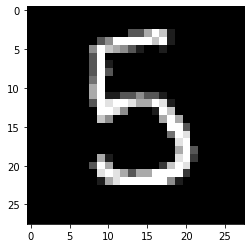

Prediction:  5


In [ ]:
image = random.choice(x_test)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()
image = (image.reshape((1, 28, 28, 1))).astype('float32')/255.0
digit = np.argmax(model.predict(image)[0], axis = -1)
print("Prediction: ", digit)